# Graded Challenge 4 - Phase 1
- Graded  Challenge  ini  dibuat  guna  mengevaluasi pembelajaran  pada  Hacktiv8  Data  Science  Fulltime Program khususnya pada konsep Clustering

# Introduction
- Nama : Harun Hawari Ash Shiddiq
- Data Set : https://www.kaggle.com/arjunbhasin2013/ccdata
- Objective : 
    - Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
    - Mampu mempersiapkan data untuk digunakan dalam Clustering
    - Mampu mengimplementasikan Clustering pada data yang diberikan

# Import Libarary

In [30]:
# Packages for Cleaning and Processing
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Feature Engineering and Preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Packages for Modelling and Machine learning
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Packages for Evaluation
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv('CC GENERAL.csv')
pd.set_option('display.max.columns', None)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**DATA SET INFORMATION**
- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently - updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not -frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently - purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not -frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

# Data Cleaning

In [5]:
missing = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(df)).round(2)*100
missing

,No. of missing values,% missing_values
CUST_ID,0,0.0
BALANCE,0,0.0
BALANCE_FREQUENCY,0,0.0
PURCHASES,0,0.0
ONEOFF_PURCHASES,0,0.0
INSTALLMENTS_PURCHASES,0,0.0
CASH_ADVANCE,0,0.0
PURCHASES_FREQUENCY,0,0.0
ONEOFF_PURCHASES_FREQUENCY,0,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0


**Terdapat missing value kolom MINIMUM_PAYMENTS	sebesar 3% dan CREDIT_LIMIT =1 karena hanya sedikit akan saya drop**

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

**Periksa data duplikasi**

In [8]:
print('Is there any duplication of data: {}'.format(df.duplicated().any()))
print('Amount of data duplication: {}'.format(df.duplicated().sum()))

Is there any duplication of data: False
Amount of data duplication: 0


# Explorasi Data

In [9]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
# Set style for EDA
plt.style.use('fivethirtyeight')

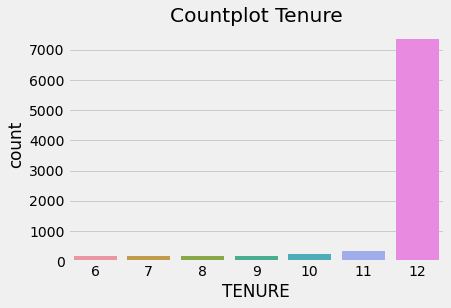

In [11]:
sns.countplot(x=df['TENURE'], data=df)
plt.title('Countplot Tenure');

**Kebanyakan pelanngan memiliki masa kepemilikan kartu kredit yang besar yaitu 12**

**Periksa korelasi antar feature**

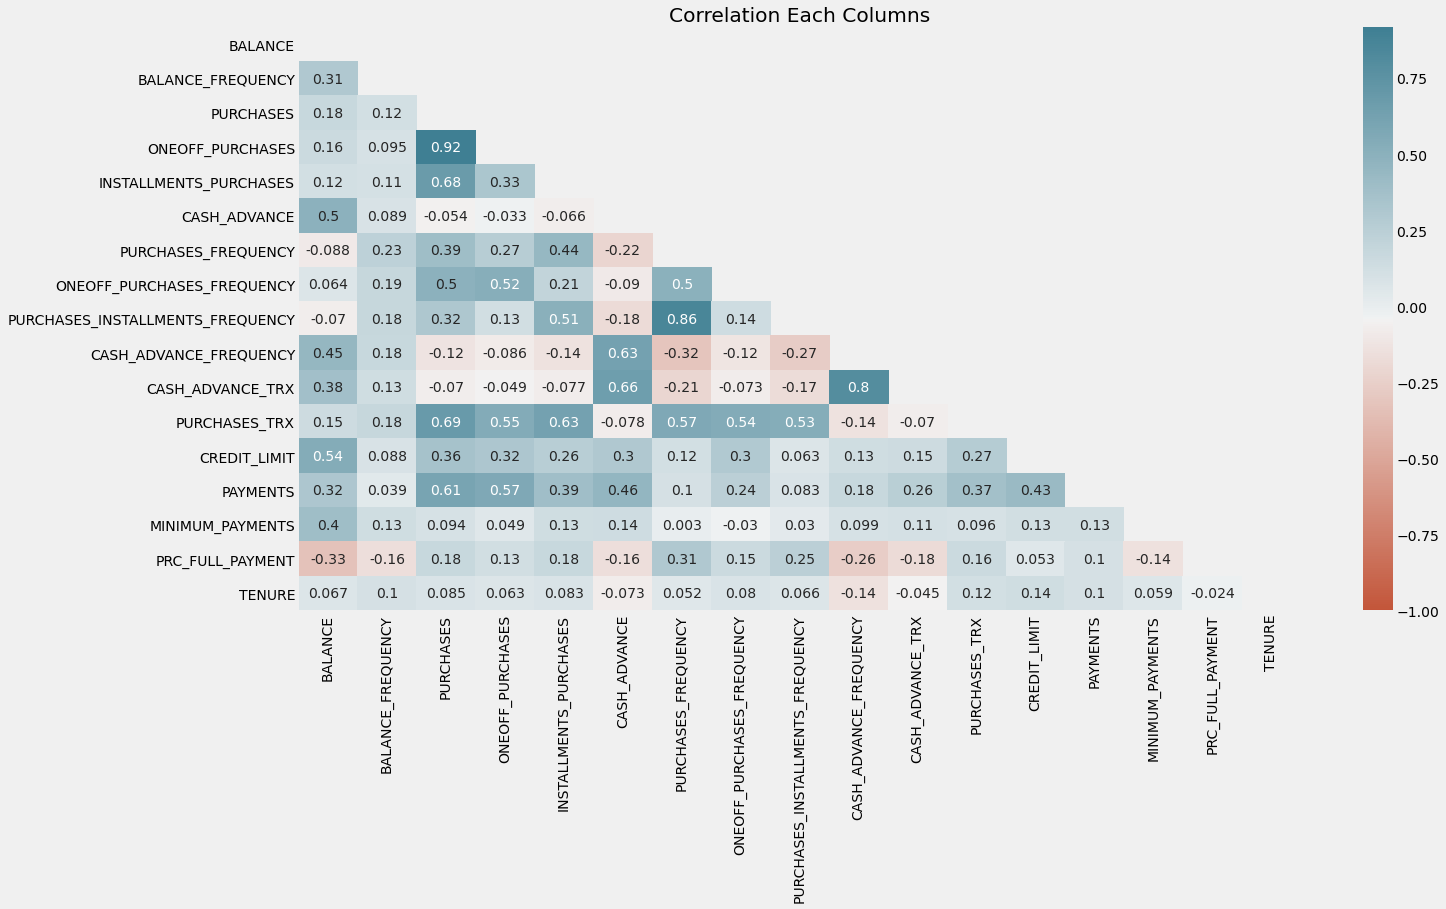

In [12]:
corr_matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, as_cmap=True), mask=corr_matrix, vmin=-1, annot=True)
plt.title('Correlation Each Columns');

**Cek persebaran data**

**CUST_ID adalah kode tiap pelanggan sehingga tidak perlu dilihat distribusinya**

In [13]:
df2 = df.copy()
df2 = df2.drop(['CUST_ID'], axis=1)
col = df2.columns.tolist()
print(col)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


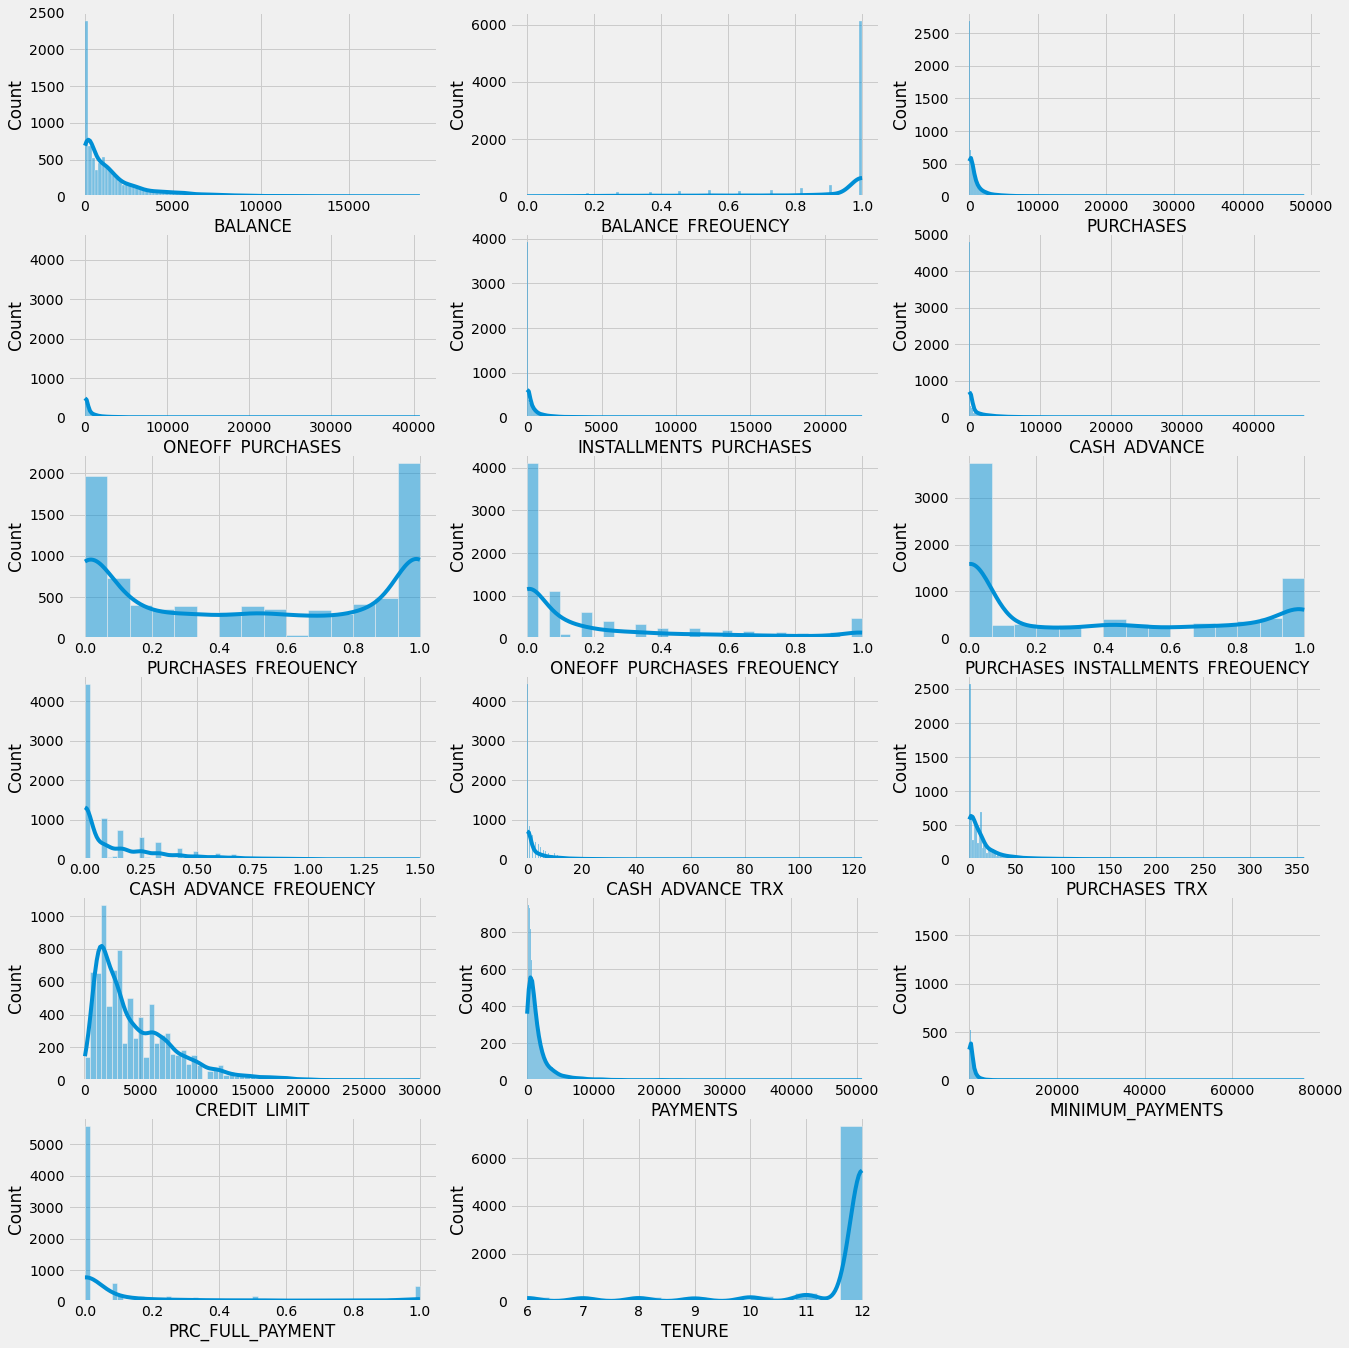

In [137]:
plt.figure(figsize=(20,60))
for i, col in enumerate(df2):
    ax = plt.subplot(16, 3, i+1)
    sns.histplot(data=df2, x=col, kde=True ,ax=ax)
plt.show()

**Distribusi mayoritas tidak normal dan grafik cenderung skew ke kanan**

**Periksa outlier dengan boxplot(IQR, distance=1.5)**

In [15]:
df2 = df.copy()
df2 = df2.drop(['CUST_ID'], axis=1)
col = df2.columns.tolist()
print(col)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


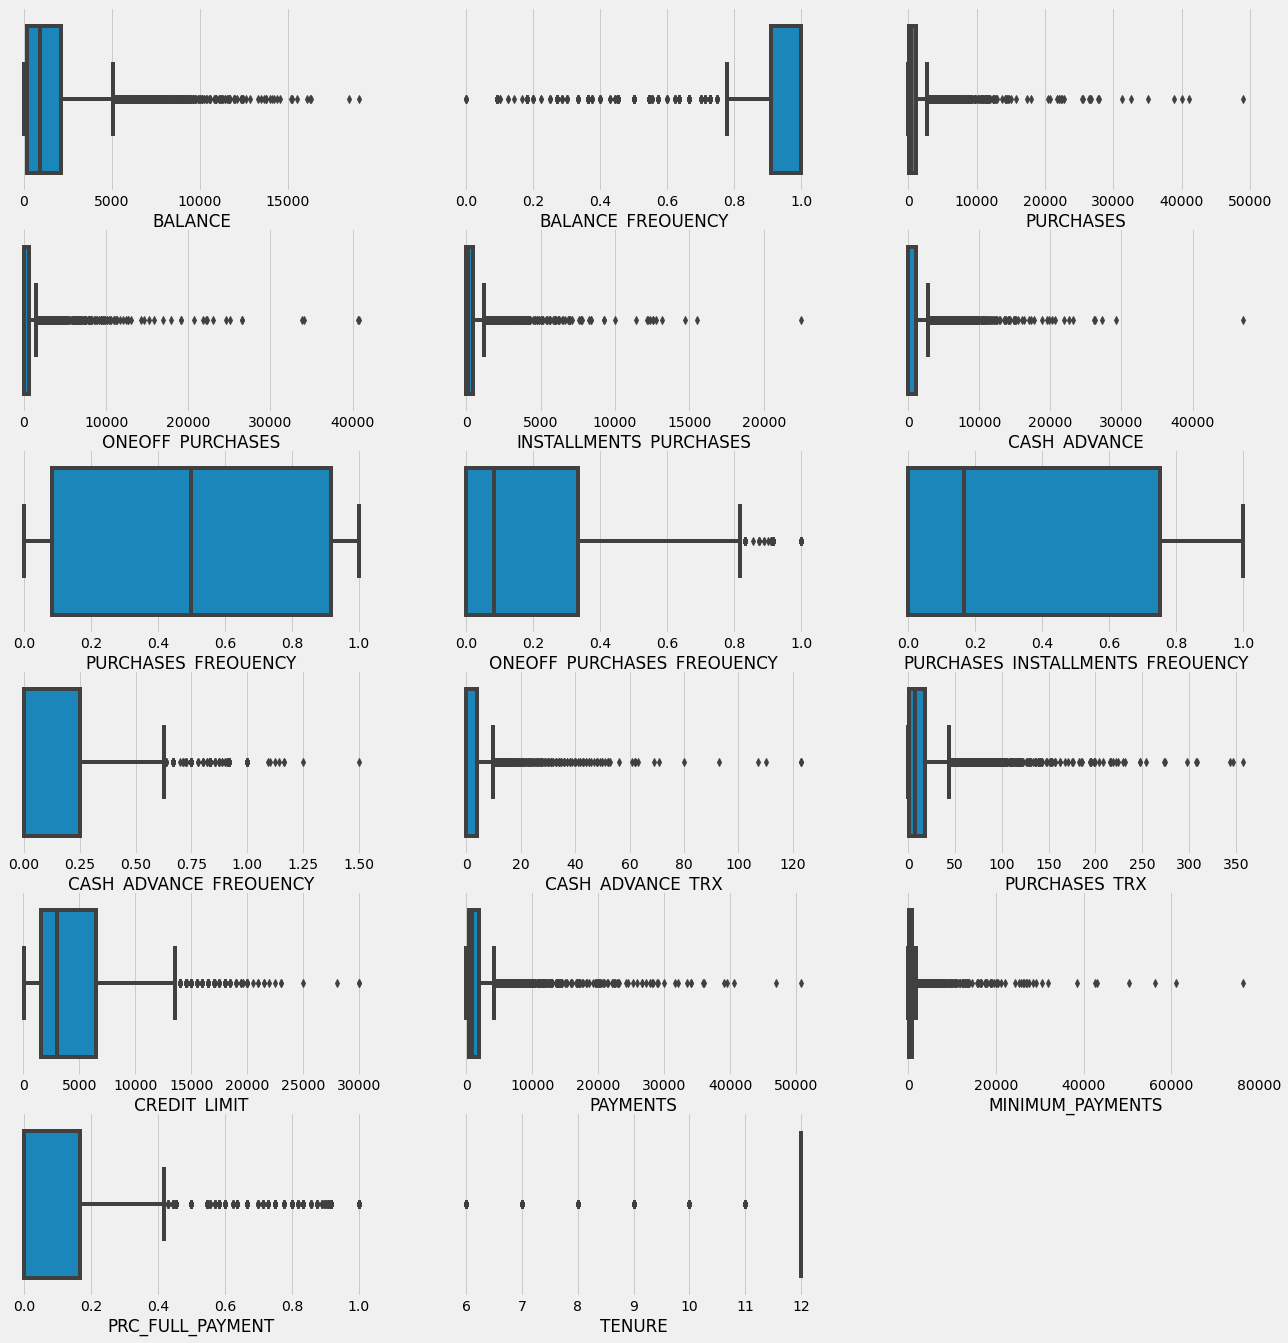

In [138]:
plt.figure(figsize=(20,60))
for i, col in enumerate(df2):
    ax = plt.subplot(16, 3, i+1)
    sns.boxplot(x=df2[col], ax=ax)

**Dari setiap kolom dapat dilihat terdapat banyak outlier sehingga lebih baik dilakukan handling outlier sebelum masuk model yang sensitif terhadap outlier**

# Data Preprocessing

**Pada tahap ini saya akan menentukan feature apa saja yang akan digunakan untuk membuat clustering. Metode yang digunakan untuk feature numerik berdasarkan value variance inflation factor**

In [17]:
X1 = df.copy()
X1 = X1.select_dtypes(include=np.number)
vif_df = pd.DataFrame()
vif_df["Feature"] = X1.columns
vif_df["VIF"] = [vif(X1.values, i) for i in range(len(X1.columns))]
vif_df

,Feature,VIF
0,BALANCE,4.161893
1,BALANCE_FREQUENCY,23.078996
2,PURCHASES,58509.808865
3,ONEOFF_PURCHASES,32612.469018
4,INSTALLMENTS_PURCHASES,10357.268059
5,CASH_ADVANCE,3.538666
6,PURCHASES_FREQUENCY,26.519081
7,ONEOFF_PURCHASES_FREQUENCY,5.689858
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.209188
9,CASH_ADVANCE_FREQUENCY,4.966228


**Hapus feature high multicollinearity yaitu nilai multicollinearity lebih dari 5 karena semakin tinggi tingkat multicol semakin besar pula juga kemungkinan feature redundant**

In [18]:
X2 = X1.copy()
X2_drop = ['PURCHASES','PURCHASES_FREQUENCY','BALANCE_FREQUENCY']
X2.drop(X2_drop, inplace=True, axis=1)
vif_df = pd.DataFrame()
vif_df['Feature'] = X2.columns
vif_df['VIF'] = [vif(X2.values, i) for i in range(len(X2.columns))]
vif_df

,Feature,VIF
0,BALANCE,3.986815
1,ONEOFF_PURCHASES,2.722258
2,INSTALLMENTS_PURCHASES,2.526463
3,CASH_ADVANCE,3.533244
4,ONEOFF_PURCHASES_FREQUENCY,2.622867
5,PURCHASES_INSTALLMENTS_FREQUENCY,3.216580
6,CASH_ADVANCE_FREQUENCY,4.700296
7,CASH_ADVANCE_TRX,3.870425
8,PURCHASES_TRX,4.037219
9,CREDIT_LIMIT,4.618244


**Berdasarkan data understanding purchase merupakan feature yang penting untuk mengetahui jumlah pembelian akun namun berdasarkan vif kolom ini disarankan tidak digunakan oleh sebab itu saya memutuskan untuk tidak menghiraukan nilai vif**

## Principal Component Analysis (PCA)

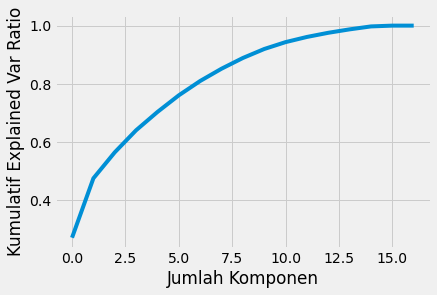

In [19]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

# Tentukan k yang sesuai
pca = PCA(whiten=True)
pca.fit(df_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure
plt.plot(cumsum)
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Explained Var Ratio')
plt.show()

In [20]:
cumsum

array([0.27231177, 0.47605485, 0.56523818, 0.64097427, 0.70374045,
       0.76086831, 0.81003019, 0.85213753, 0.8889545 , 0.91976958,
       0.94340762, 0.96115301, 0.97542011, 0.98720671, 0.99728768,
       0.99999931, 1.        ])

**Berdasarkan grafik di atas dengan 10 feature sudah dapat 91% informasi**

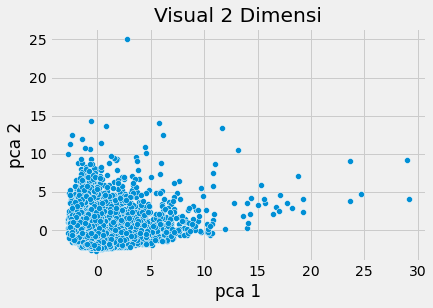

In [21]:
pca_final = PCA(n_components=10).fit_transform(df_scaled)
sns.scatterplot(x=pca_final[:,0],y=pca_final[:,1])
plt.title('Visual 2 Dimensi')
plt.xlabel('pca 1')
plt.ylabel('pca 2');

In [73]:
df_pca_final = pd.DataFrame(data=pca_final,columns=['pca','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
df_pca_final.head()

,pca,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647


## Define and Training Model

## Kmean Clustering

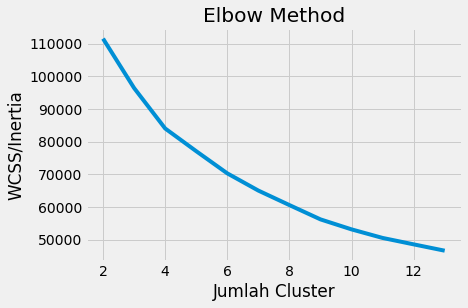

In [23]:
K =[2,3,4,5,6,7,8,9,10,11,12,13]
inertia = [KMeans(n_clusters=i).fit(pca_final).inertia_ for i in K]

plt.plot(K, inertia)
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS/Inertia');

**Berdasarkan elbow method jumlah cluster yang paling baik adalah k=4**

In [24]:
kmeans = KMeans(n_clusters=4, random_state=77)
kmeans_clustering = kmeans.fit_predict(pca_final)
kmeans_clustering

array([0, 2, 1, ..., 1, 0, 0])

In [80]:
df_kmean_clustering = df_pca_final.copy()
df_kmean_clustering['cluster'] = kmeans_clustering
df_kmean_clustering

,pca,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,cluster
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402,0
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468,2
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854,1
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532,0
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647,1
...,...,...,...,...,...,...,...,...,...,...,...
8631,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848,-0.870622,-0.590283,-0.185911,0
8632,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426,-0.210773,1.342838,-0.745134,1
8633,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757,-0.630976,0.558226,-0.779909,1
8634,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810,-0.263088,0.972588,0.340042,0


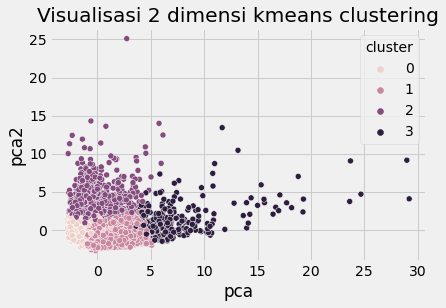

In [26]:
sns.scatterplot(x='pca', y='pca2', hue='cluster', data=df_pca_final)
plt.title('Visualisasi 2 dimensi kmeans clustering');

In [27]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.22349765861089266
For n_clusters = 3 The average silhouette_score is : 0.2573711812999541
For n_clusters = 4 The average silhouette_score is : 0.21915947017489687
For n_clusters = 5 The average silhouette_score is : 0.20739127309668226
For n_clusters = 6 The average silhouette_score is : 0.22805979200675489
For n_clusters = 7 The average silhouette_score is : 0.24339915162850295
For n_clusters = 8 The average silhouette_score is : 0.2495396431080604


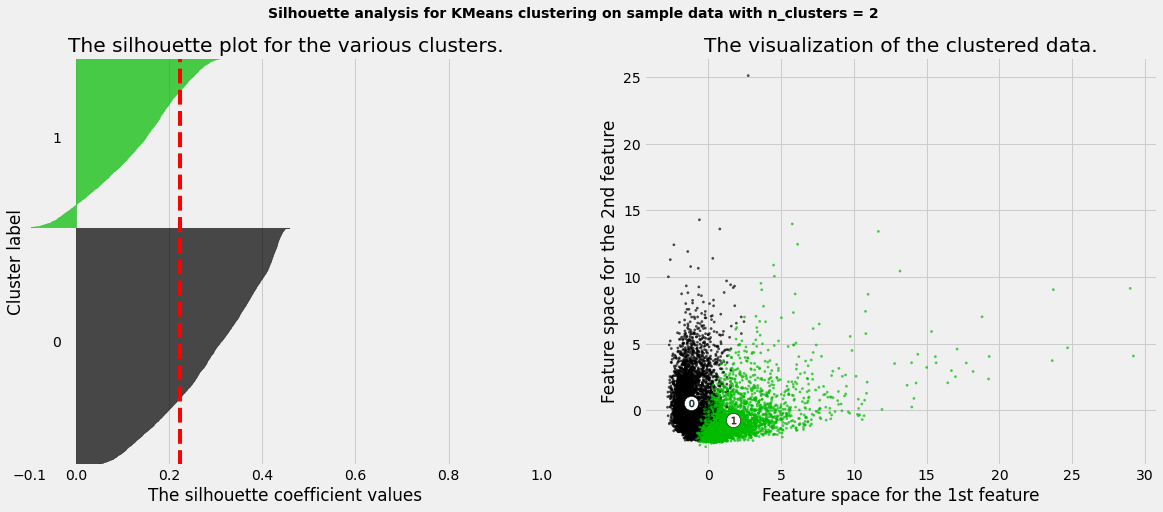

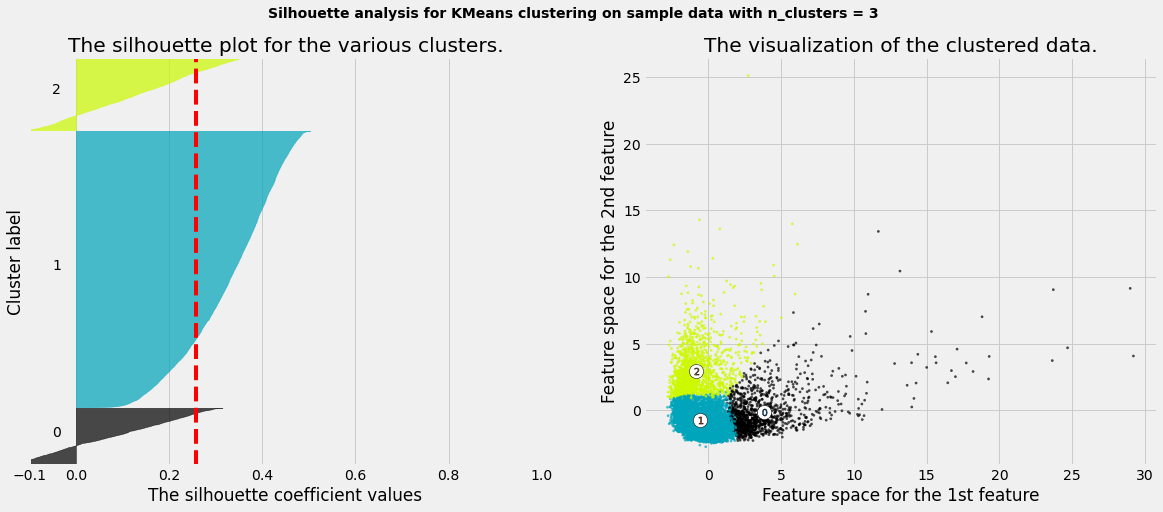

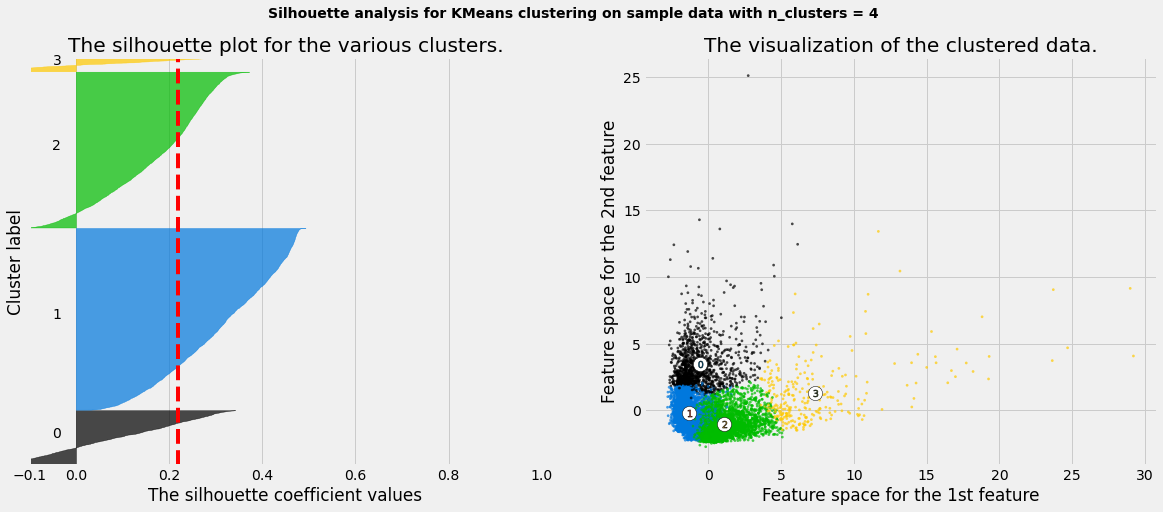

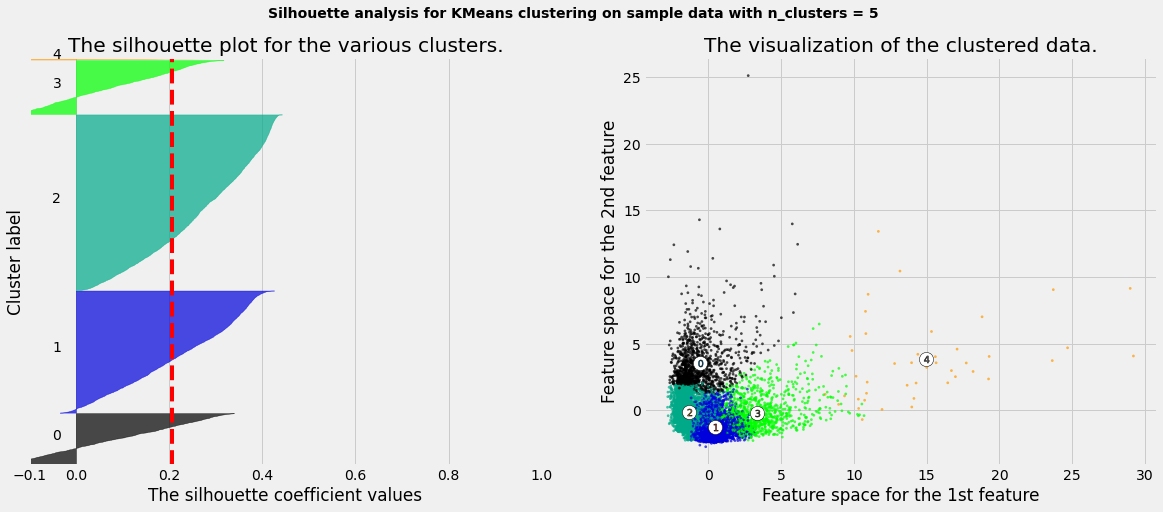

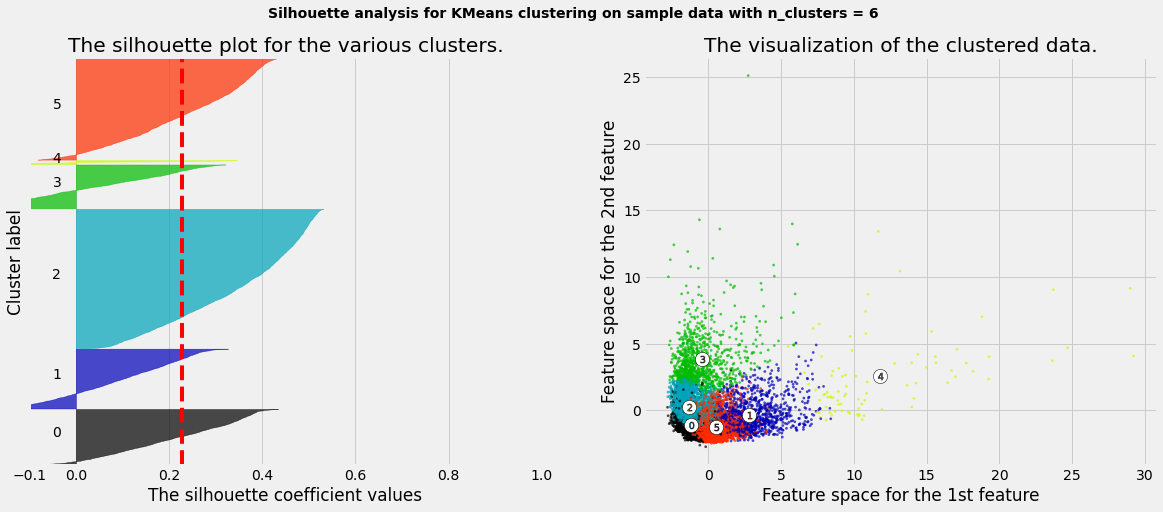

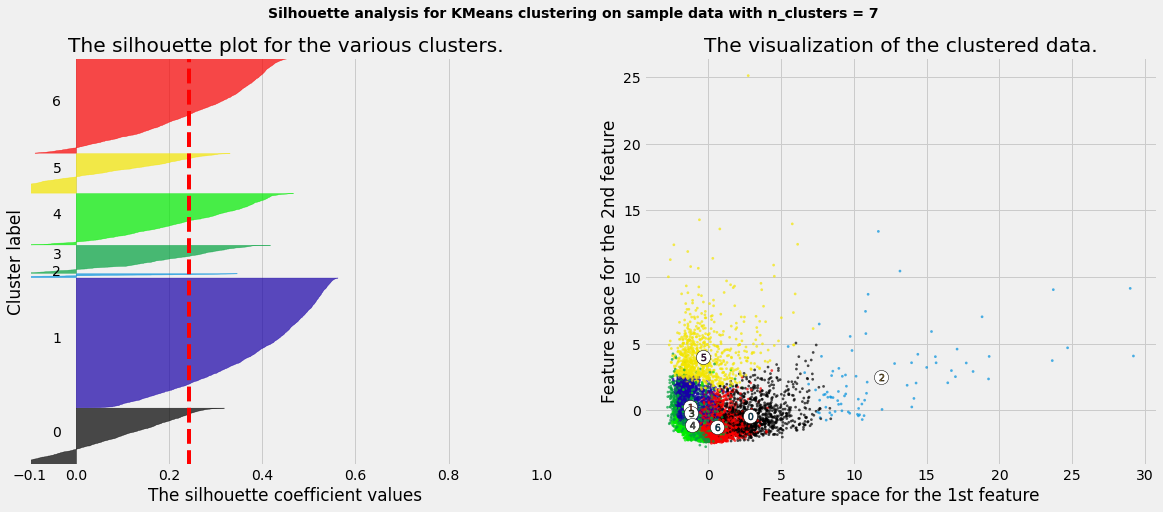

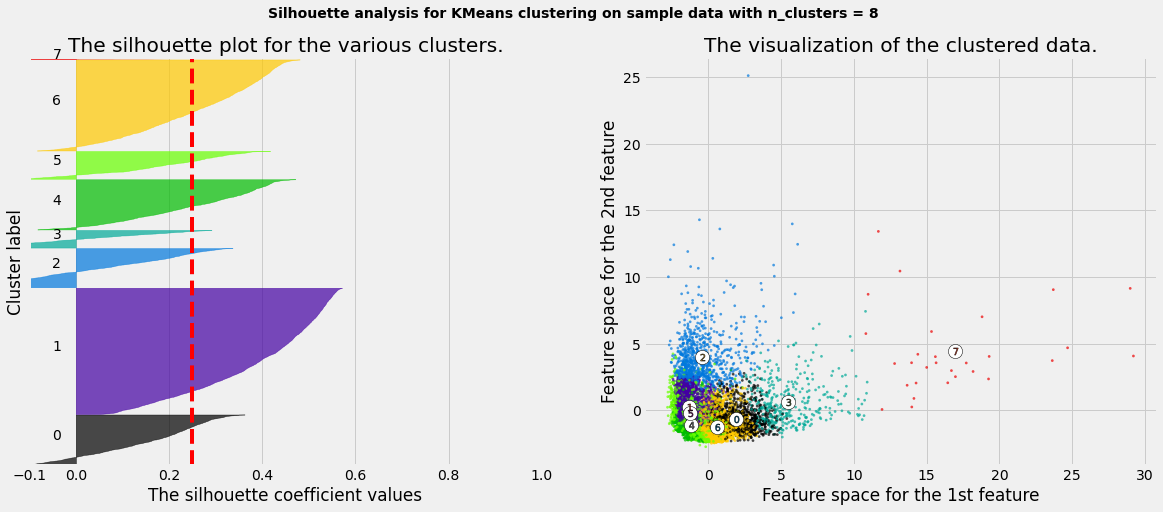

In [28]:
K =[2,3,4,5,6,7,8]
plot_silhouette(K, pca_final)

**Berdasarkan silhoutte score jumlah cluster yang paling baik adalah k=3**

## DBScan Clustering

In [49]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

**Umumnya, Jumlah MinPoints Sama dengan Dua Kali Jumlah Kolom dalam Dataset**

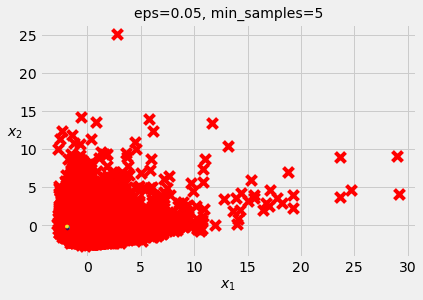

In [57]:
dbs = DBSCAN(eps=0.05, min_samples=5)
dbs.fit(pca_final)
plot_dbscan(dbs,pca_final,size=100)

In [58]:
silhouette_score(pca_final, dbs.labels_)

-0.2505043063622398

**Dengan eps 0.05 dari plot 2 dimensi hasil pca kurang terlihat pengelompokkan hasil clusteringnya dari visualisasi terlihat anomali memonopoli dan hasil silhoutte score masih negatif dengan kata lain masih banyak miss klasifikasi**

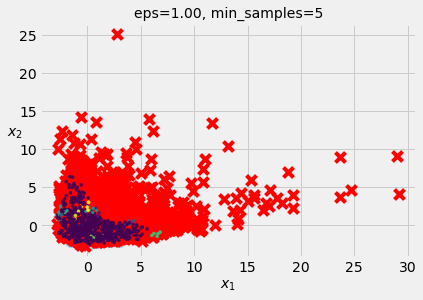

In [55]:
dbs=DBSCAN(eps=1, min_samples=5)
dbs.fit(pca_final)
plot_dbscan(dbs,pca_final,size=100)

In [56]:
silhouette_score(pca_final, dbs.labels_)

-0.27806253904710243

**Hasil menunjukkan sudah mulai terlihat hasil clustering namun dari silhoutte score masih negatif yang mengidentifikasikan ada miss clasifikasi**

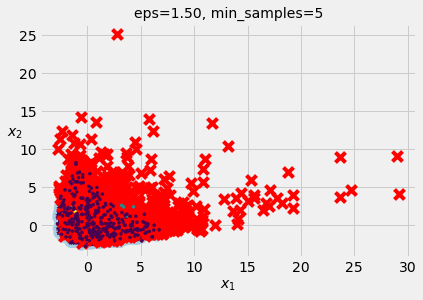

In [53]:
dbs=DBSCAN(eps=1.5, min_samples=5)
dbs.fit(pca_final)
plot_dbscan(dbs,pca_final,size=100)

In [54]:
silhouette_score(pca_final, dbs.labels_)

0.2593988580828758

**Dari hasil visual sudah nampak clusternya dan dari silhouette score bernilai 0.25**

In [95]:
dbs_final = DBSCAN(eps=1.5, min_samples=5).fit_predict(pca_final)
df_dbscan_clustering = df_pca_final.copy()
df_dbscan_clustering['cluster'] = dbs_final
df_dbscan_clustering['cluster'].replace({-1:'anomaly'},inplace=True)
df_dbscan_clustering

,pca,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,cluster
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402,0
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468,0
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854,0
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532,0
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647,0
...,...,...,...,...,...,...,...,...,...,...,...
8631,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848,-0.870622,-0.590283,-0.185911,0
8632,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426,-0.210773,1.342838,-0.745134,0
8633,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757,-0.630976,0.558226,-0.779909,0
8634,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810,-0.263088,0.972588,0.340042,0


In [109]:
df_dbscan_clustering['cluster'].unique()

array([0, 'anomaly', 2, 1], dtype=object)

In [108]:
df_dbscan_clustering[df_dbscan_clustering['cluster']=='anomaly']

,pca,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,cluster
5,6.265598,-0.609449,2.085564,-0.577785,-0.965617,-1.091335,-1.369075,1.058575,0.759205,-0.030365,anomaly
20,5.405116,1.806124,-0.149372,0.991306,-1.810922,0.398688,-0.760472,-0.376742,-1.344151,0.525258,anomaly
22,2.678095,3.680146,0.310827,-1.423986,1.122588,-0.570288,0.571920,-0.440153,-0.326712,-2.493620,anomaly
29,3.604160,4.308982,-2.461154,0.454711,1.372145,-0.076040,-1.113667,-1.692500,-0.326309,0.886585,anomaly
33,1.947859,1.421026,-2.163368,2.654121,4.791282,1.540883,-2.191977,2.855441,-1.289631,-1.813241,anomaly
...,...,...,...,...,...,...,...,...,...,...,...
8554,-0.260028,-0.116211,-0.614241,-2.841751,0.537482,1.175921,-1.524471,0.047096,0.777784,-0.724809,anomaly
8588,1.246460,-1.235825,0.828514,-1.293855,-2.106805,2.854013,-1.255793,0.309168,0.312478,-0.538044,anomaly
8605,-1.954449,0.694645,2.472476,-4.220379,0.756981,2.237589,-1.428779,0.999182,0.733080,0.809400,anomaly
8613,1.048349,-1.804557,0.285783,-2.463485,-0.959686,3.088971,-1.869797,0.048965,0.143119,0.090273,anomaly


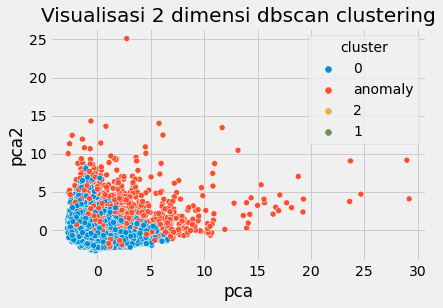

In [97]:
sns.scatterplot(df_dbscan_clustering['pca'], df_dbscan_clustering['pca2'], hue=df_dbscan_clustering['cluster'])
plt.title('Visualisasi 2 dimensi dbscan clustering');

## Aggloremative Clustering 

**Dari kmean kita tau kira2 berapa cluster untuk data ini yaitu 3 atau 4**

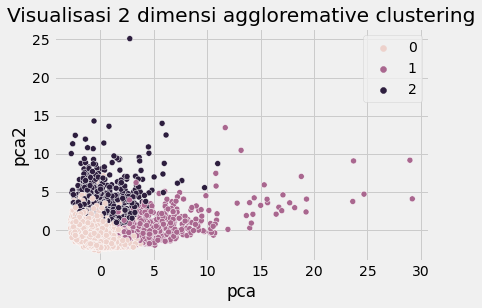

In [100]:
agg=AgglomerativeClustering(linkage="ward", n_clusters=3).fit(pca_final) 
sns.scatterplot(x=pca_final[:,0],y=pca_final[:,1],hue=agg.labels_)
plt.title('Visualisasi 2 dimensi aggloremative clustering')
plt.xlabel('pca')
plt.ylabel('pca2');

In [102]:
silhouette_score(pca_final,agg.labels_)

0.27408079949374514

**Dari hasil 3 cluster terlihat pengelompokkannya dan didapatkan silhouette score 0.27**

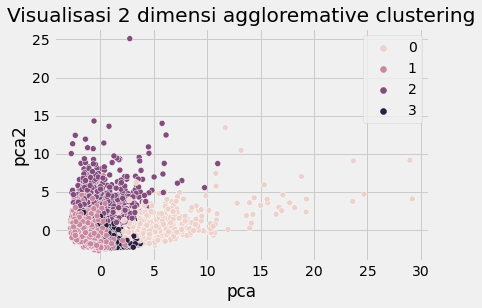

In [103]:
agg=AgglomerativeClustering(linkage="ward", n_clusters=4).fit(pca_final) 
sns.scatterplot(x=pca_final[:,0],y=pca_final[:,1],hue=agg.labels_)
plt.title('Visualisasi 2 dimensi aggloremative clustering')
plt.xlabel('pca')
plt.ylabel('pca2');

In [105]:
silhouette_score(pca_final,agg.labels_)

0.1340707313248422

**Jika dibandingkan score cluster 3 dan 4 silhouette score cluster 4 sangat kecil oleh karena itu baiknya menggunakan 3 cluster untuk model agglomerative**

In [106]:
agg=AgglomerativeClustering(linkage="ward", n_clusters=3).fit_predict(pca_final) 
df_agg_clustering = df_pca_final.copy()
df_agg_clustering['cluster'] = agg
df_agg_clustering

,pca,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,cluster
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402,0
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468,2
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854,0
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532,0
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647,0
...,...,...,...,...,...,...,...,...,...,...,...
8631,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848,-0.870622,-0.590283,-0.185911,0
8632,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426,-0.210773,1.342838,-0.745134,0
8633,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757,-0.630976,0.558226,-0.779909,0
8634,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810,-0.263088,0.972588,0.340042,0


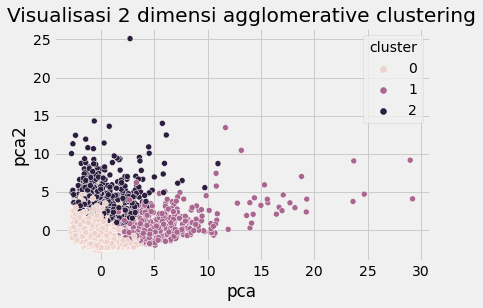

In [107]:
sns.scatterplot(df_agg_clustering['pca'], df_agg_clustering['pca2'], hue=df_agg_clustering['cluster'])
plt.title('Visualisasi 2 dimensi agglomerative clustering');

- Best cluster kmean adalah 3 dengan silhouette score 0.21
- Best dbscan kmean adalah 3 dengan silhouette score 0.25
- Best dbscan kmean adalah 3 dengan silhouette score 0.27

# Model Inference

**Model inference menggunakan best model yaitu agglomerative**

In [115]:
df2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [131]:
new_data = df2.sample(100)

In [133]:
new_data_scaled = scaler.fit_transform(new_data)
new_data_pca = PCA(n_components=10).fit_transform(new_data_scaled) # 10 feature seperti preprocessing
new_data_agg = AgglomerativeClustering(linkage="ward", n_clusters=3).fit_predict(new_data_pca) # 3 cluster seperti best model agg

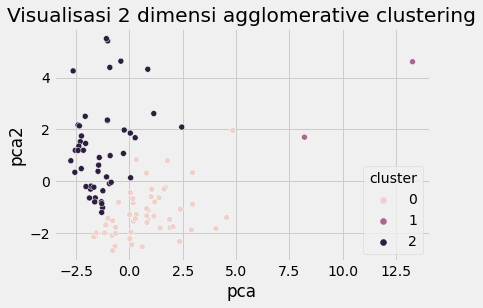

In [136]:
new_data=pd.DataFrame(data=new_data_pca,columns=['pca','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
new_data['cluster'] = new_data_agg
sns.scatterplot(new_data['pca'], new_data['pca2'], hue=new_data['cluster'])
plt.title('Visualisasi 2 dimensi agglomerative clustering');

# Overall Analysis
- Masih terdapat outlier sehingga untuk kmean saat modelling cenderung terdapat miss clasifikasi
- rata-rata pelanggan memiliki masa berlaku kartu yang lama
- Meskipun rata-rata distribusi skew namun untuk feature frekuensi itu bagus karena menunjukkan betapa seringnya suatu hal dilakukan dalam hal ini seperti balance frekuensi menunjukkan bahwa pelanngan masik aktif mengisi saldonya

# Model Analysis
- Setelah dilakukan modelling dengan kmean clustering menggunakan elbow methode cluster terbaik adalah cluster 4 namun ketika menggunakan silhouette score didapatkan cluster 3 dengan score tertinggi 0.25. namun setelah dianalisis grafik dari cluster 3 terdapat ketidak konsistenan yaitu ada 1 cluster yang gambarnya sangat kecil sehingga pada kasus ini best cluster adalah 3 dengan silhouette score 0.21.
- Model dbscan didapatkan cluster terbaik adalah 3 dan terdapat data anomaly sebesar 775 dengan silhouette score 0.25
- Model agglomerative didapatkan 3 cluster dengan silhoette score 0.27
- Berdasarkan silhoutte score best model adalah agglomerative